<a href="https://colab.research.google.com/github/AnnLivio/Cyclistic/blob/main/Cyclistic_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CYCLISTIC · Data Analysis

**Cyclistic** es un programa de bicicletas compartidas que incluye 5,800 bicicletas y más de 600 estaciones en Chicago. Se destaca por ofrecer también bicicletas reclinadas, triciclos manuales y bicicletas de carga que ofrecen un uso más inclusivo para los ciclistas que no pueden utilizar una bicicleta estándar.
Uno de los enfoques que ayudó a hacer esto posible fue la flexibilidad de sus planes de precios: `pases de un solo viaje`, `pases de un día completo` y `membresías anuales`. A los clientes que compran pases de un solo viaje o pases de un día completo se los llama ciclistas ocasionales. Los clientes con membresías anuales se llaman miembros de Cyclistic.

### Pregunta inicial:
¿En qué se diferencian los socios anuales y los ciclistas ocasionales con respecto al uso de las bicicletas de Cyclistic?



## Cargar librerías y paquetes

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Set palette for graphics
custom_palette = ["#696960", "#b0dd60",  "#ebeb93"]
sns.set_palette(custom_palette)

## Cargar datos para el análisis

In [3]:
#Load the full dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone/data/cyclistic_clean_data.csv")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5851552 entries, 0 to 5851551
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  ride_lenght         object 
 14  weekday             object 
dtypes: float64(4), object(11)
memory usage: 669.7+ MB


## Seleccionar columnas necesarias

In [ ]:
# Select column of interest
my_cols = ['rideable_type', 'started_at', 'ended_at', 'start_station_name', 'end_station_name', 'member_casual', 'ride_lenght', 'weekday']
df = df[my_cols]
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_lenght,weekday
0,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),Sheffield Ave & Webster Ave,member,0 days 00:12:53,Sunday
1,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,Sheffield Ave & Webster Ave,member,0 days 00:12:09,Wednesday
2,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),Franklin St & Lake St,member,0 days 00:04:20,Thursday
3,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,Franklin St & Lake St,member,0 days 00:05:26,Tuesday
4,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,Franklin St & Lake St,member,0 days 00:11:30,Monday


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5851552 entries, 0 to 5851551
Data columns (total 8 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   rideable_type       object
 1   started_at          object
 2   ended_at            object
 3   start_station_name  object
 4   end_station_name    object
 5   member_casual       object
 6   ride_lenght         object
 7   weekday             object
dtypes: object(8)
memory usage: 357.2+ MB


## Convertir columnas al tipo correcto

`started_at` y `ended_at` a tipo *datetime* y `ride_lenght` a *timedelta*

In [ ]:
# Convert the `started_at` and `ended_at` column to datetime.
df['started_at'] = pd.to_datetime(df['started_at'], format='ISO8601')
df['ended_at'] = pd.to_datetime(df['ended_at'],  format='ISO8601')

# Convert the 'ride_lenght' to timedelta
df['ride_lenght'] = pd.to_timedelta(df['ride_lenght'])

In [ ]:
# Create column month
df['month'] = df['started_at'].dt.month

In [ ]:
# Create column ride_in_seconds
df['ride_in_seconds'] = df['ride_lenght'].dt.total_seconds()

In [ ]:
#Create list of weekday in order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


## Dividir dataset en 2 subsets: members y casual

In [ ]:
# Group data for members
df_members = df.query("member_casual == 'member'")

# Group data for casuals
df_casual = df.query("member_casual == 'casual'")

### Viajes por día de la semana
**Member users**

In [ ]:
df_members.groupby('weekday')['ride_lenght'].count().reset_index(name='counts').sort_values('counts', ascending=False).style.background_gradient()

,weekday,counts
6,Wednesday,612889
4,Thursday,583618
5,Tuesday,570822
1,Monday,539980
0,Friday,519689
2,Saturday,473132
3,Sunday,421667


**Casual users**

In [ ]:
df_casual.groupby(['weekday'])['ride_lenght'].count().reset_index(name='counts').sort_values('counts', ascending=False).style.background_gradient()

,weekday,counts
2,Saturday,429983
3,Sunday,366448
0,Friday,305888
6,Wednesday,271100
4,Thursday,267578
1,Monday,254554
5,Tuesday,234204


## Boxplot para members por día de la semana

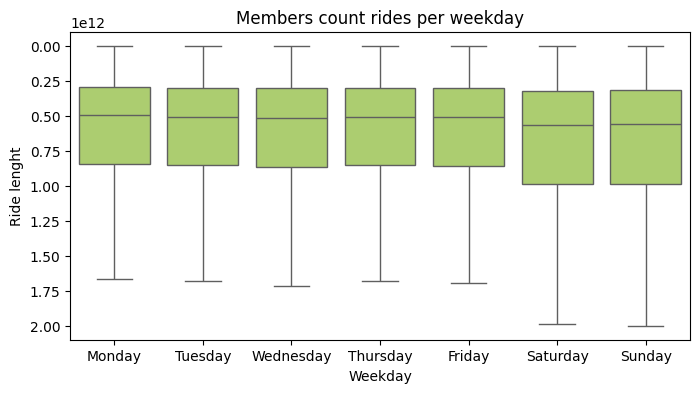

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_members["weekday"],y=df_members["ride_lenght"], order=weekday_order, showfliers=False, color='#b0dd60')
plt.title('Members count rides per weekday')
plt.xlabel('Weekday')
plt.ylabel('Ride lenght')
plt.show()

## Rides por día de la semana para Casual

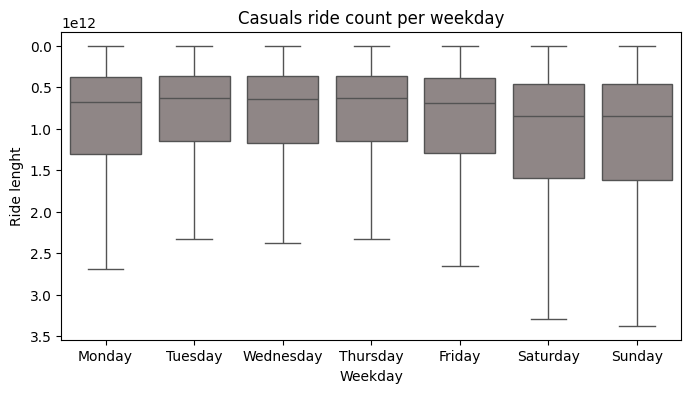

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_casual["weekday"],y=df_casual["ride_lenght"], order=weekday_order, showfliers=False, color='#908585')
plt.title('Casuals ride count per weekday')
plt.xlabel('Weekday')
plt.ylabel('Ride lenght')
plt.show()

## La moda en días de la semana

In [ ]:
stats_dict = {}
for i in ['members', 'casual']:
  # 1. Convert `started_at` and `ended_at` in datetime
  exec(f"median = df_{i}['ride_lenght'].median()")
  exec(f"max = df_{i}['ride_lenght'].max()")
  exec(f"min = df_{i}['ride_lenght'].min()")
  exec(f"mean = df_{i}['ride_lenght'].mean()")
  exec(f"std = df_{i}['ride_lenght'].std()")
  exec(f"count = df_{i}['ride_lenght'].count()")
  exec(f"mode = df_{i}['weekday'].mode()")
  exec(f"Q1 = df_{i}['ride_lenght'].quantile(0.25)")
  exec(f"Q3 = df_{i}['ride_lenght'].quantile(0.75)")

  stats_dict[i] = {'median': median, 'mean': mean, 'max': max, 'min': min, 'std':std, 'mode': mode[0], 'count':count, 'Q1':Q1, 'Q3':Q3}

stats_df = pd.DataFrame(stats_dict)
stats_df


,members,casual
median,0 days 00:08:40.467000,0 days 00:12:00
mean,0 days 00:12:49.850469939,0 days 00:25:08.303247889
max,1 days 01:59:48,1 days 01:59:56
min,0 days 00:00:00,0 days 00:00:00
std,0 days 00:37:21.164462338,0 days 01:30:05.247969503
mode,Wednesday,Saturday
count,3721797,2129755
Q1,0 days 00:05:05,0 days 00:06:39
Q3,0 days 00:14:46,0 days 00:22:37.929000


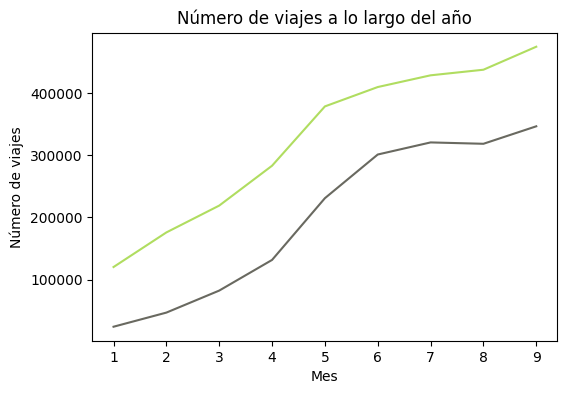

In [ ]:
# Agrupa por mes y cuenta los viajes
rides_per_month_casual = df_casual.query('month < 10').groupby('month')['member_casual'].count().reset_index()
rides_per_month_member = df_members.query('month < 10').groupby('month')['member_casual'].count().reset_index()

# Crea el linechart
plt.figure(figsize=(6, 4))
plt.plot(rides_per_month_casual['month'], rides_per_month_casual['member_casual'])
plt.plot(rides_per_month_member['month'], rides_per_month_member['member_casual'])

# Personaliza el gráfico
plt.title('Número de viajes a lo largo del año')
plt.xlabel('Mes')
plt.ylabel('Número de viajes')

plt.show()

## Comparativas entre miembros vs ocasionales

In [ ]:
#Percentage of members by category
df['member_casual'].value_counts(normalize=True)*100

,proportion
member_casual,
member,63.603588
casual,36.396412


In [ ]:
#Percentage of members by category
df.groupby('member_casual')['ride_lenght'].mean()

,ride_lenght
member_casual,
casual,0 days 00:25:08.303247889
member,0 days 00:12:49.850469939


In [ ]:
#Generate bar chart
def generate_graph(dft, title, y_col, x_col):
  # Crea el gráfico de barras (el resto del código es igual)
  plt.figure(figsize=(10, 6))
  sns.barplot(x=x_col, y=y_col, hue='member_casual', data=dft, order=weekday_order)

  # Personaliza el gráfico
  plt.title(title)
  plt.xlabel(x_col)
  plt.ylabel(y_col)

  plt.title(title)
  plt.xlabel('Day of week')
  plt.ylabel('Total ride_lenght')
  plt.legend(title='Member type')

  # Show graph
  plt.show()

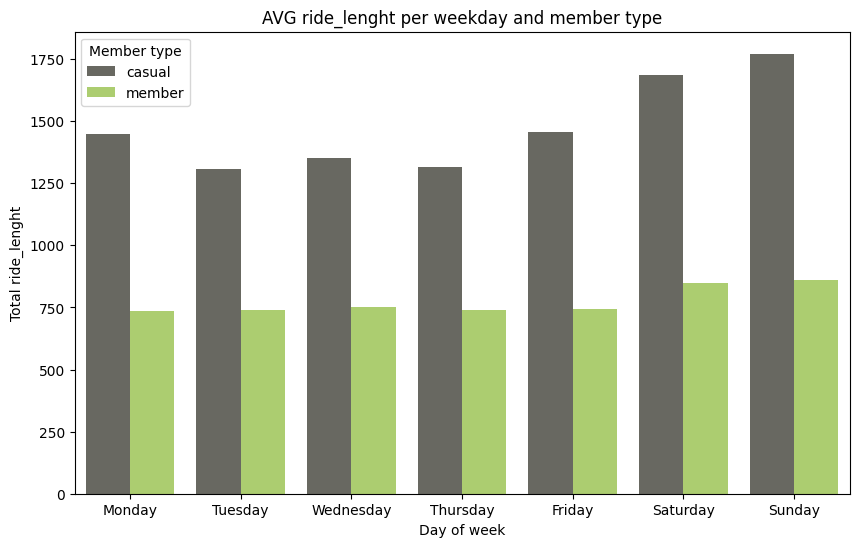

In [ ]:
# Group data by 'weekday' y 'member_casual', and calculate mean of 'ride_lenght'
grouped_data = df.groupby(['weekday', 'member_casual'], observed=False)['ride_in_seconds'].mean().reset_index()

# Sort DataFrame by 'weekday'
grouped_data = grouped_data.sort_values('weekday')

# Call function to generate graph
generate_graph(grouped_data, 'AVG ride_lenght per weekday and member type', y_col='ride_in_seconds', x_col='weekday')

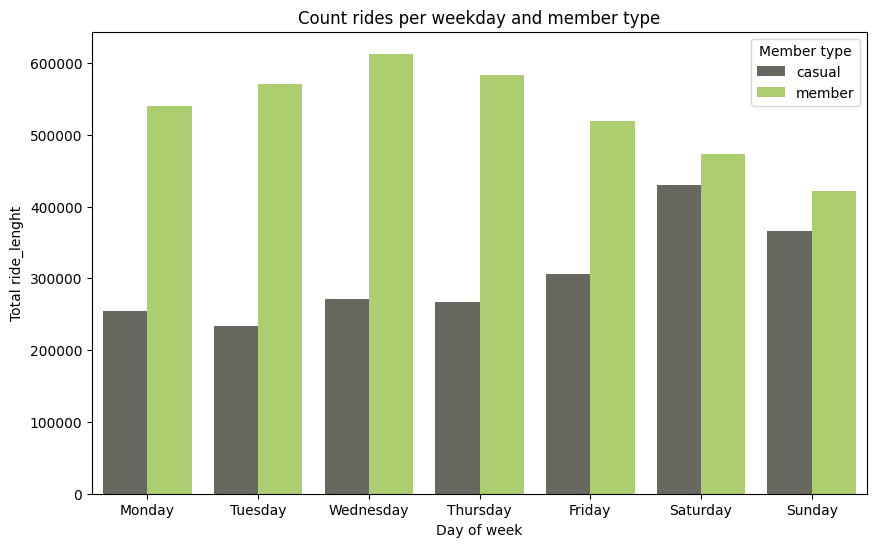

In [ ]:
# Group data by 'weekday' y 'member_casual', and calculate mean of 'ride_lenght'
grouped_data = df.groupby(['weekday', 'member_casual'], observed=False)['member_casual'].value_counts().reset_index()

# Call function to generate graph
generate_graph(grouped_data, 'Count rides per weekday and member type', y_col='count', x_col='weekday')

## Preferencia de tipo de bicicleta por tipo de usuario

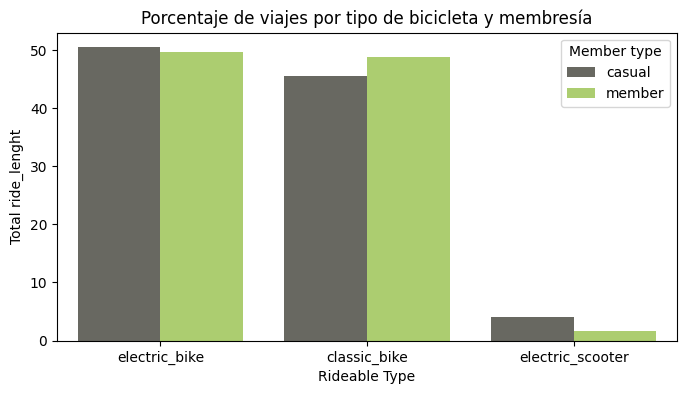

In [ ]:
group_data3 = df.groupby('member_casual')['rideable_type'].value_counts(normalize=True)*100
group_data3 = group_data3.reset_index()

  # Crea el gráfico de barras (el resto del código es igual)
plt.figure(figsize=(8, 4))
sns.barplot(x='rideable_type', y='proportion', hue='member_casual', data=group_data3)

  # Personaliza el gráfico
plt.title('Porcentaje de viajes por tipo de bicicleta y membresía')
plt.xlabel('Rideable Type')
plt.ylabel('Total ride_lenght')
plt.legend(title='Member type')

# Muestra el gráfico
plt.show()

## Estaciones más frequentes para Casuals

In [ ]:
end_stations = df_casual['end_station_name'].value_counts().reset_index(name='count')
start_stations = df_casual['start_station_name'].value_counts().reset_index(name='count')


st1 = start_stations.sort_values('count', ascending=False).reset_index(drop=True)
st2 = end_stations.sort_values('count', ascending=False).reset_index(drop=True)
about_stations = pd.concat([st1.iloc[0:10,], st2.iloc[0:10,]],
                           axis=1)
about_stations

,start_station_name,count,end_station_name,count
0,Streeter Dr & Grand Ave,49103,Streeter Dr & Grand Ave,52616
1,DuSable Lake Shore Dr & Monroe St,32903,DuSable Lake Shore Dr & Monroe St,30636
2,Michigan Ave & Oak St,24675,DuSable Lake Shore Dr & North Blvd,25963
3,DuSable Lake Shore Dr & North Blvd,22684,Michigan Ave & Oak St,25174
4,Millennium Park,21833,Millennium Park,23498
5,Shedd Aquarium,20519,Shedd Aquarium,18517
6,Dusable Harbor,18021,Theater on the Lake,17627
7,Theater on the Lake,16459,Dusable Harbor,16157
8,Michigan Ave & 8th St,13264,Michigan Ave & 8th St,11965
9,Adler Planetarium,12862,Wabash Ave & Grand Ave,11382


In [ ]:
end_st = df_members['end_station_name'].value_counts().reset_index(name='count')
start_st = df_members['start_station_name'].value_counts().reset_index(name='count')


stm1 = start_st.sort_values('count', ascending=False).reset_index(drop=True)
stm2 = end_st.sort_values('count', ascending=False).reset_index(drop=True)
about_stationsm = pd.concat([st1.iloc[0:10,0], st2.iloc[0:10,0], stm1.iloc[0:8,0], stm2.iloc[0:8,0]],
                           axis=1)
about_stationsm

,start_station_name,end_station_name,start_station_name,end_station_name
0,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Kingsbury St & Kinzie St,Clinton St & Washington Blvd
1,DuSable Lake Shore Dr & Monroe St,DuSable Lake Shore Dr & Monroe St,Clinton St & Washington Blvd,Kingsbury St & Kinzie St
2,Michigan Ave & Oak St,DuSable Lake Shore Dr & North Blvd,Clark St & Elm St,Clinton St & Madison St
3,DuSable Lake Shore Dr & North Blvd,Michigan Ave & Oak St,Clinton St & Madison St,Clark St & Elm St
4,Millennium Park,Millennium Park,Wells St & Concord Ln,Wells St & Concord Ln
5,Shedd Aquarium,Shedd Aquarium,Wells St & Elm St,Wells St & Elm St
6,Dusable Harbor,Theater on the Lake,Clinton St & Jackson Blvd,Clinton St & Jackson Blvd
7,Theater on the Lake,Dusable Harbor,State St & Chicago Ave,State St & Chicago Ave
8,Michigan Ave & 8th St,Michigan Ave & 8th St,NaN,NaN
9,Adler Planetarium,Wabash Ave & Grand Ave,NaN,NaN


In [ ]:
# Identify the top 20 locations with most days of lightning.
df_casual.start_station_name.value_counts()[:10].rename_axis('unique_values').reset_index(name='counts').style.background_gradient()

,unique_values,counts
0,Streeter Dr & Grand Ave,49103
1,DuSable Lake Shore Dr & Monroe St,32903
2,Michigan Ave & Oak St,24675
3,DuSable Lake Shore Dr & North Blvd,22684
4,Millennium Park,21833
5,Shedd Aquarium,20519
6,Dusable Harbor,18021
7,Theater on the Lake,16459
8,Michigan Ave & 8th St,13264
9,Adler Planetarium,12862


### Cantidad de viajes por tipo de bicicleta

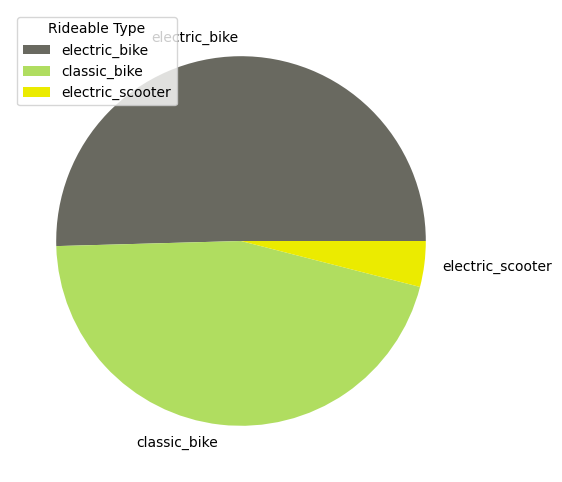

In [ ]:
group_by_rideable_type = df_casual[['rideable_type']].value_counts(normalize=True)*100
group_by_rideable_type = group_by_rideable_type.reset_index()

# Create the pie chart with labels
plt.figure(figsize=(10, 6))
plt.pie(group_by_rideable_type['proportion'], labels=group_by_rideable_type['rideable_type']) # Add labels and percentage format

# Add a legend

plt.legend(title="Rideable Type", loc='upper left')
plt.show()

In [ ]:
df_members[['rideable_type']].value_counts(normalize=True)*100

,proportion
rideable_type,
electric_bike,49.67689
classic_bike,48.73506
electric_scooter,1.58805


In [ ]:
datag = df_casual.groupby('rideable_type')['weekday'].value_counts().reset_index(name='counts')

<Axes: xlabel='weekday', ylabel='counts'>

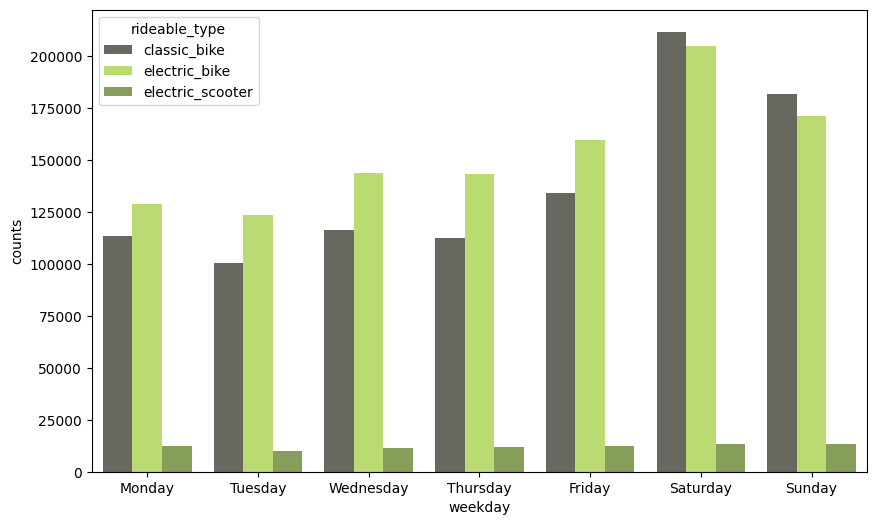

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(y='counts', x='weekday', hue='rideable_type', data=datag, dodge=True, order=weekday_order)

In [ ]:
# Set palette for graphics
custom_palette = ["#696960", "#c0ed60",  "#8ba950"]
sns.set_palette(custom_palette)